# Crawling data berita

In [ ]:
!pip install Sastrawi
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
import pandas as pd

# Unduh konten halaman web berita
url = "https://radarjatim.id/festival-film-pendek-layar-lokal-diserbu-ratusan-pelajar-sma-dan-smk/"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="content-inner")  # Sesuaikan dengan struktur HTML halaman web berita

# Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
if article is not None:
    article_text = article.get_text()

    # Tokenisasi teks menjadi kalimat menggunakan nltk
    nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
    sentences = nltk.sent_tokenize(article_text)

    # Cetak kalimat-kalimat
    for sentence in sentences:
        print(sentence)
else:
    print("Elemen berita tidak ditemukan")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



SIDOARJO (RadarJatim.id) — Komunitas-komunitas film pendek yang ada di Sidoarjo terus bergerak, mensosialisasikan keberadaan film pendek yang berkembang membaik.
Kali ini bertemakan ‘Keanekaragaman Lokalitas dan Budaya’ pada tanggal 28-29 Oktober 2023 di Gedung Dewan Kesenian Sidoarjo.
Festival yang memutar film ‘Layar Lokal’ mengangkat kearifan lokal dari berbagai wilayah di Indonesia tersebut, tak diduga diserbu oleh para remaja, rata-rata pelajar SMA, SMK Sidoarjo, Surabaya dan sekitarnya.
Sehingga panitia pun harus menambahkan kursi untuk penonton.
Ketua Asfis (Asosiasi Sineas Film Sidoarjo) Rehal Lahir Prias Sumputari mengatakan kalau kegiatannya mempunyai tiga program utama, yaitu pelatihan, workshop dan pemutaran film.
Juga membantu teman-teman komunitas film yang ada di Sidoarjo, khususnya untuk mendistribusikan karya-karyanya ke berbagai festival.
“Karena kebanyakan teman-teman saat ini kendalanya adalah bagaimana film ini setelah syuting.
Itu mau dikemanakan, teman-teman mas

In [ ]:
# Inisialisasi DataFrame
df = pd.DataFrame(columns=["Kalimat"])
df["Kalimat"] = sentences
df

,Kalimat
0,\nSIDOARJO (RadarJatim.id) — Komunitas-komunit...
1,Kali ini bertemakan ‘Keanekaragaman Lokalitas ...
2,Festival yang memutar film ‘Layar Lokal’ menga...
3,Sehingga panitia pun harus menambahkan kursi u...
4,Ketua Asfis (Asosiasi Sineas Film Sidoarjo) Re...
5,Juga membantu teman-teman komunitas film yang ...
6,“Karena kebanyakan teman-teman saat ini kendal...
7,"Itu mau dikemanakan, teman-teman masih bingung..."
8,Itu menjadi tugas kami untuk bersama-sama kita...
9,"Jadi tidak hanya membuat film, tidak hanya fil..."


In [ ]:
def cleaning(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text).strip()
  return text

df['data_clean'] = df['Kalimat'].apply(cleaning)
df['data_clean']

0     SIDOARJO RadarJatimid  Komunitaskomunitas film...
1     Kali ini bertemakan Keanekaragaman Lokalitas d...
2     Festival yang memutar film Layar Lokal mengang...
3     Sehingga panitia pun harus menambahkan kursi u...
4     Ketua Asfis Asosiasi Sineas Film Sidoarjo Reha...
5     Juga membantu temanteman komunitas film yang a...
6     Karena kebanyakan temanteman saat ini kendalan...
7     Itu mau dikemanakan temanteman masih bingung a...
8     Itu menjadi tugas kami untuk bersamasama kita ...
9     Jadi tidak hanya membuat film tidak hanya film...
10    Kemudian sekedar informasi juga Layar Lokal in...
11    Yang lainnya kebanyakan dari kampus dari insta...
12    Dan saat ini kita Alhamdulillah sudah berjalan...
13    Tahun ini kita kembali membuka submission pend...
14    Ada  film yang mendaftarkan dalam Layar Lokal ...
15    Pesen saya buat temanteman ini festival gratis...
16    Kita bisa belajar tentang kearifan lokal maupu...
17    Semoga temanteman bisa hadir dan bisa meno

In [ ]:
def cek_specialCharacter(dokumen):
  karakter = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '+', '=', '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '?', '/', '`', '~']
  for i in dokumen:
    if i in karakter :
      print(dokumen)
df['data_clean'].apply(cek_specialCharacter)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
Name: data_clean, dtype: object

Tokenizing

In [ ]:
def tokenizer(text):
  text = text.lower()
  return word_tokenize(text)

df['Tokenizing'] = df['data_clean'].apply(tokenizer)
df['Tokenizing']

0     [sidoarjo, radarjatimid, komunitaskomunitas, f...
1     [kali, ini, bertemakan, keanekaragaman, lokali...
2     [festival, yang, memutar, film, layar, lokal, ...
3     [sehingga, panitia, pun, harus, menambahkan, k...
4     [ketua, asfis, asosiasi, sineas, film, sidoarj...
5     [juga, membantu, temanteman, komunitas, film, ...
6     [karena, kebanyakan, temanteman, saat, ini, ke...
7     [itu, mau, dikemanakan, temanteman, masih, bin...
8     [itu, menjadi, tugas, kami, untuk, bersamasama...
9     [jadi, tidak, hanya, membuat, film, tidak, han...
10    [kemudian, sekedar, informasi, juga, layar, lo...
11    [yang, lainnya, kebanyakan, dari, kampus, dari...
12    [dan, saat, ini, kita, alhamdulillah, sudah, b...
13    [tahun, ini, kita, kembali, membuka, submissio...
14    [ada, film, yang, mendaftarkan, dalam, layar, ...
15    [pesen, saya, buat, temanteman, ini, festival,...
16    [kita, bisa, belajar, tentang, kearifan, lokal...
17    [semoga, temanteman, bisa, hadir, dan, bis

Stopword

In [ ]:
corpus = stopwords.words('indonesian')

def stopwordText(words):
 return [word for word in words if word not in corpus]

df['Stopword Removal'] = df['Tokenizing'].apply(stopwordText)

# Gabungkan kembali token menjadi kalimat utuh
df['stopword'] = df['Stopword Removal'].apply(lambda x: ' '.join(x))
df['stopword']

0     sidoarjo radarjatimid komunitaskomunitas film ...
1     kali bertemakan keanekaragaman lokalitas buday...
2     festival memutar film layar lokal mengangkat k...
3                                panitia kursi penonton
4     ketua asfis asosiasi sineas film sidoarjo reha...
5     membantu temanteman komunitas film sidoarjo me...
6         kebanyakan temanteman kendalanya film syuting
7              dikemanakan temanteman bingung disiapkan
8                  tugas bersamasama jalan pembuat film
9     film film disimpan hard disk film berkeliling ...
10    sekedar informasi layar lokal festival film in...
11    kebanyakan kampus instansi pemerintah ya surab...
12    alhamdulillah berjalan semoga berjalan tahuntahun
13    membuka submission pendaftaran film tingkat na...
14    film mendaftarkan layar lokal provinsi indones...
15    pesen temanteman festival gratis full gratis m...
16    belajar kearifan lokal budaya daerahdaerah sid...
17    semoga temanteman hadir menonton diskusi f

In [ ]:
def tfidf(dokumen):
  vectorizer = TfidfVectorizer()
  x = vectorizer.fit_transform(dokumen).toarray()
  terms = vectorizer.get_feature_names_out()

  final_tfidf = pd.DataFrame(x, columns=terms)
  final_tfidf.insert(0, 'Kalimat', dokumen)

  return (vectorizer, final_tfidf)

tfidf_vectorizer, final_tfidf = tfidf(df['stopword'])
final_tfidf

,Kalimat,aceh,alhamdulillah,asfis,asfisfilmkearifanlayarlokalpendekradarjatimid,asosiasi,barat,belajar,bergengsi,bergerak,...,temanteman,tenggara,terhenti,timur,tingkat,tugas,utama,wilayah,workshop,ya
0,sidoarjo radarjatimid komunitaskomunitas film ...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.273168,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,kali bertemakan keanekaragaman lokalitas buday...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,festival memutar film layar lokal mengangkat k...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.254385,0.000000,0.000000
3,panitia kursi penonton,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,ketua asfis asosiasi sineas film sidoarjo reha...,0.000000,0.000000,0.259595,0.00000,0.259595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.259595,0.000000,0.259595,0.000000
5,membantu temanteman komunitas film sidoarjo me...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.289679,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,kebanyakan temanteman kendalanya film syuting,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.365096,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,dikemanakan temanteman bingung disiapkan,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.363895,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,tugas bersamasama jalan pembuat film,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.48785,0.000000,0.000000,0.000000,0.000000
9,film film disimpan hard disk film berkeliling ...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Teks contoh
text = "kal"

# Tokenisasi kalimat
sentences = sent_tokenize(text)

# Mengambil daftar kata penghubung
stop_words = set(stopwords.words('indonesian'))

# Mencetak kata penghubung dalam setiap kalimat
for sentence in sentences:
    words = word_tokenize(sentence)
    connectors = [word for word in words if word.lower() in stop_words]
    print(f"Kata penghubung dalam kalimat '{sentence}': {connectors}")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
SIDOARJO (RadarJatim.id) — Komunitas-komunitas film pendek yang ada di Sidoarjo terus bergerak, mensosialisasikan keberadaan film pendek yang berkembang membaik.
ada: 0.1451
bergerak: 0.2299
berkembang: 0.2299
di: 0.1210
film: 0.1872
id: 0.2025
keberadaan: 0.2299
komunitas: 0.4049
membaik: 0.2299
mensosialisasikan: 0.2299
pendek: 0.4598
radarjatim: 0.2299
sidoarjo: 0.2903
terus: 0.2299
yang: 0.2420

Kalimat 2: Kali ini bertemakan ‘Keanekaragaman Lokalitas dan Budaya’ pada tanggal 28-29 Oktober 2023 di Gedung Dewan Kesenian Sidoarjo.
2023: 0.2565
28: 0.2565
29: 0.2565
bertemakan: 0.2565
budaya: 0.2259
dan: 0.1619
dewan: 0.2565
di: 0.1350
gedung: 0.2565
ini: 0.1518
kali: 0.2565
keanekaragaman: 0.2565
kesenian: 0.2565
lokalitas: 0.2565
oktober: 0.2565
pada: 0.2565
sidoarjo: 0.1619
tanggal: 0.2565

Kalimat 3: Festival yang memutar film ‘Layar Lokal’ mengangkat kearifan lokal dari berbagai wilayah di Indonesia tersebut, tak diduga diserbu oleh para remaja, rata-rata pelajar SMA,

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0633


In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0633
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.0899
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0749
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.2560
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0232
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0402
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0223
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.0465
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0701
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.1084
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0149
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0267
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.1364
Cosine Similarity antara Kalimat 1 dan Kalimat 16: 0.0373
Cosine Similarity antara Kalimat 1 dan Kalimat 17: 0.1645
Cosine Similarity antara Kalimat 1 dan Kalimat 18: 0.0258
Cosine Similarity anta

In [ ]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,...,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15,Kalimat 16,Kalimat 17,Kalimat 18,Kalimat 19,Kalimat 20,Kalimat 21
Kalimat 1,1.000000,0.063343,0.089933,0.000000,0.074870,0.256029,0.023170,0.040180,0.022279,0.046462,...,0.108394,0.014934,0.026697,0.136397,0.037299,0.164544,0.025822,0.089661,0.000000,0.091768
Kalimat 2,0.063343,1.000000,0.054998,0.000000,0.045611,0.049363,0.054688,0.000000,0.000000,0.020784,...,0.028010,0.085676,0.031506,0.016771,0.022009,0.144807,0.028808,0.000000,0.000000,0.000000
Kalimat 3,0.089933,0.054998,1.000000,0.000000,0.050252,0.122287,0.010059,0.017444,0.009672,0.036347,...,0.148023,0.050275,0.011590,0.189338,0.127974,0.182524,0.058064,0.135645,0.032073,0.000000
Kalimat 4,0.000000,0.000000,0.000000,1.000000,0.000000,0.056202,0.000000,0.090488,0.057704,0.000000,...,0.000000,0.000000,0.069148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kalimat 5,0.074870,0.045611,0.050252,0.000000,1.000000,0.046383,0.022482,0.000000,0.021618,0.091900,...,0.014568,0.041694,0.025905,0.017445,0.036192,0.044223,0.025056,0.020025,0.035843,0.000000
Kalimat 6,0.256029,0.049363,0.122287,0.056202,0.046383,1.000000,0.173056,0.189464,0.058242,0.028784,...,0.138648,0.018504,0.069792,0.120610,0.222834,0.169625,0.229889,0.055547,0.000000,0.000000
Kalimat 7,0.023170,0.054688,0.010059,0.000000,0.022482,0.173056,1.000000,0.175726,0.014738,0.030735,...,0.056428,0.095181,0.092387,0.011893,0.213272,0.071593,0.156996,0.013652,0.000000,0.000000
Kalimat 8,0.040180,0.000000,0.017444,0.090488,0.000000,0.189464,0.175726,1.000000,0.049206,0.034207,...,0.106996,0.000000,0.000000,0.041249,0.141442,0.023733,0.162802,0.047348,0.000000,0.000000
Kalimat 9,0.022279,0.000000,0.009672,0.057704,0.021618,0.058242,0.014738,0.049206,1.000000,0.061271,...,0.040296,0.031400,0.118593,0.011436,0.023725,0.049532,0.000000,0.013127,0.033958,0.000000
Kalimat 10,0.046462,0.020784,0.036347,0.000000,0.091900,0.028784,0.030735,0.034207,0.061271,1.000000,...,0.041289,0.056999,0.035414,0.054255,0.069316,0.049452,0.068506,0.062278,0.133184,0.000000


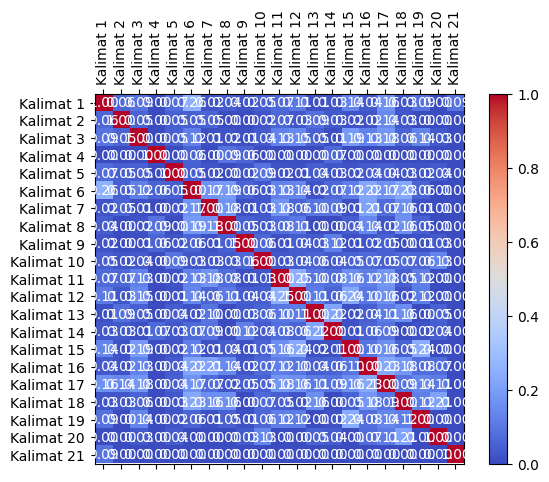

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

In [ ]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of 
SIDOARJO (RadarJatim.id) — Komunitas-komunitas film pendek yang ada di Sidoarjo terus bergerak, mensosialisasikan keberadaan film pendek yang berkembang membaik.: 23.9900
Closeness Centrality of Kali ini bertemakan ‘Keanekaragaman Lokalitas dan Budaya’ pada tanggal 28-29 Oktober 2023 di Gedung Dewan Kesenian Sidoarjo.: 22.2549
Closeness Centrality of Festival yang memutar film ‘Layar Lokal’ mengangkat kearifan lokal dari berbagai wilayah di Indonesia tersebut, tak diduga diserbu oleh para remaja, rata-rata pelajar SMA, SMK Sidoarjo, Surabaya dan sekitarnya.: 26.8875
Closeness Centrality of Sehingga panitia pun harus menambahkan kursi untuk penonton.: 11.9523
Closeness Centrality of Ketua Asfis (Asosiasi Sineas Film Sidoarjo) Rehal Lahir Prias Sumputari mengatakan kalau kegiatannya mempunyai tiga program utama, yaitu pelatihan, workshop dan pemutaran film.: 25.6112
Closeness Centrality of Juga membantu teman-teman komunitas film yang ada di Sidoarjo, khususnya u

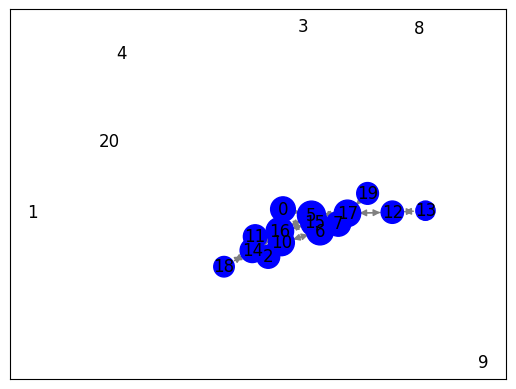

In [ ]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.15 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

In [ ]:
# Cetak closeness centrality
print("Closeness Centrality:")
# for node, closeness in closeness_centrality.items():
#     print(f"Node {node}: {closeness:.4f}")
sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
for node, closeness in sorted_closeness.items():
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 5: 0.4083
Node 16: 0.3920
Node 6: 0.3769
Node 15: 0.3769
Node 17: 0.3630
Node 10: 0.3500
Node 0: 0.3161
Node 7: 0.3161
Node 14: 0.3062
Node 11: 0.2882
Node 2: 0.2722
Node 12: 0.2579
Node 19: 0.2450
Node 18: 0.2178
Node 13: 0.1922
Node 1: 0.0000
Node 3: 0.0000
Node 4: 0.0000
Node 8: 0.0000
Node 9: 0.0000
Node 20: 0.0000


In [ ]:
# Cetak closeness centrality
top_3_closeness = list(sorted_closeness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datacl = {
    "Node": [node for node, _ in top_3_closeness],
    "Closeness Centrality": [closeness for _, closeness in top_3_closeness],
    "Kalimat": [sentences[node] for node, _ in top_3_closeness]
}

df_top_3 = pd.DataFrame(datacl)

# Cetak DataFrame
print("Tiga Node Closeness Teratas")
df_top_3

Tiga Node Closeness Teratas


,Node,Closeness Centrality,Kalimat
0,5,0.408333,Juga membantu teman-teman komunitas film yang ...
1,16,0.392000,"“Kita bisa belajar tentang kearifan lokal, mau..."
2,6,0.376923,“Karena kebanyakan teman-teman saat ini kendal...


In [ ]:
# Hitung PageRank
pagerank = nx.pagerank(G)

# Cetak PageRank dalam urutan dari terbesar ke terkecil
print("PageRank :")
sorted_pagerank = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))
for node, rank in sorted_pagerank.items():
    print(f"Node {node}: {rank:.4f}")

PageRank :
Node 16: 0.1145
Node 17: 0.1096
Node 5: 0.0978
Node 14: 0.0903
Node 6: 0.0823
Node 10: 0.0677
Node 15: 0.0667
Node 11: 0.0531
Node 7: 0.0528
Node 12: 0.0516
Node 2: 0.0387
Node 0: 0.0372
Node 13: 0.0314
Node 19: 0.0250
Node 18: 0.0248
Node 1: 0.0094
Node 3: 0.0094
Node 4: 0.0094
Node 8: 0.0094
Node 9: 0.0094
Node 20: 0.0094


In [ ]:
# Cetak closeness centrality
top_3_pagerank = list(sorted_pagerank.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datapg = {
    "Node": [node for node, _ in top_3_pagerank],
    "Pagerank": [rank for _, rank in top_3_pagerank],
    "Kalimat": [sentences[node] for node, _ in top_3_pagerank]
}

df_top_3pg = pd.DataFrame(datapg)

# Cetak DataFrame
print("Tiga Node Pagerank Teratas")
df_top_3pg

Tiga Node Pagerank Teratas


,Node,Pagerank,Kalimat
0,16,0.114476,"“Kita bisa belajar tentang kearifan lokal, mau..."
1,17,0.109592,Semoga teman-teman bisa hadir dan bisa menonto...
2,5,0.097806,Juga membantu teman-teman komunitas film yang ...


In [ ]:
import pandas as pd

# Hitung betweenness centrality
betweenness= nx.betweenness_centrality(G)

# Cetak DataFrame
print("DataFrame Betweenness Centrality:")
sorted_betweenness = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))
for node, between in sorted_betweenness.items():
    print(f"Node {node}: {between:.4f}")

DataFrame Betweenness Centrality:
Node 17: 0.1860
Node 16: 0.1618
Node 5: 0.0996
Node 14: 0.0750
Node 12: 0.0684
Node 6: 0.0623
Node 10: 0.0491
Node 15: 0.0452
Node 0: 0.0000
Node 1: 0.0000
Node 2: 0.0000
Node 3: 0.0000
Node 4: 0.0000
Node 7: 0.0000
Node 8: 0.0000
Node 9: 0.0000
Node 11: 0.0000
Node 13: 0.0000
Node 18: 0.0000
Node 19: 0.0000
Node 20: 0.0000


In [ ]:
# Cetak closeness centrality
top_3_between = list(sorted_betweenness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
databw = {
    "Node": [node for node, _ in top_3_between],
    "Between": [between for _, between in top_3_between],
    "Kalimat": [sentences[node] for node, _ in top_3_between]
}

df_top_3bw = pd.DataFrame(databw)

# Cetak DataFrame
print("Tiga Node Between Teratas")
df_top_3bw

Tiga Node Between Teratas


,Node,Between,Kalimat
0,17,0.185965,Semoga teman-teman bisa hadir dan bisa menonto...
1,16,0.161842,"“Kita bisa belajar tentang kearifan lokal, mau..."
2,5,0.099561,Juga membantu teman-teman komunitas film yang ...
